### EVOLUTION OF THE NOMINAL GDP per capita IN SPAIN (by regions - series 2000-2016 - €) 

In [1]:
import pandas as pd
import numpy as np
import matplotlib as plt
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from math import sqrt
import matplotlib as plt
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.preprocessing import normalize
from pandas import DataFrame
import warnings
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles
from sklearn.datasets import make_classification, make_regression
from sklearn.externals import six
import argparse
import json
import re
import os
import sys
import plotly
import plotly.graph_objs as go
plotly.offline.init_notebook_mode()
warnings.filterwarnings('ignore')
% matplotlib inline

UsageError: Line magic function `%` not found.


In [2]:
GDP_cap=pd.read_csv('./data/GDP_capita_spanish_regions.csv')

**We have a compilation of the nominal GDP per capita for each region/autonomous entity of Spain and the national average (in € / from 2000 to 2016)**


We can analyse the territorialized evolution of the nominal GDP per capita in Spain, identify the economic cicles, the spread between regions, and examine if there has been a convergence (in GDP per capita) between regions from 2000 to 2016. 

In [3]:
GDP_cap.columns #We check our column labels

Index(['REGION', ' 2000', '2001', '2002', '2003', '2004', '2005', '2006',
       '2007', '2008', '2009', '2010', '2011', '2012', '2013', '2014', '2015',
       '2016'],
      dtype='object')

In [4]:
GDP_cap.index   #We check our index labels

RangeIndex(start=0, stop=20, step=1)

We set the colum Regions as our index:

In [5]:
GDP_cap.set_index('REGION',inplace=True)

In [6]:
GDP_cap.index = GDP_cap.index.astype(str)

First we can create a **BOXPLOT** to visualize the distribution of the nominal GDP per capita between the regions (from 2000 to 2016) :

Text(0.5, 1.0, 'Boxplots, spanish regions distribution of the nominal GDP per capita (€)')

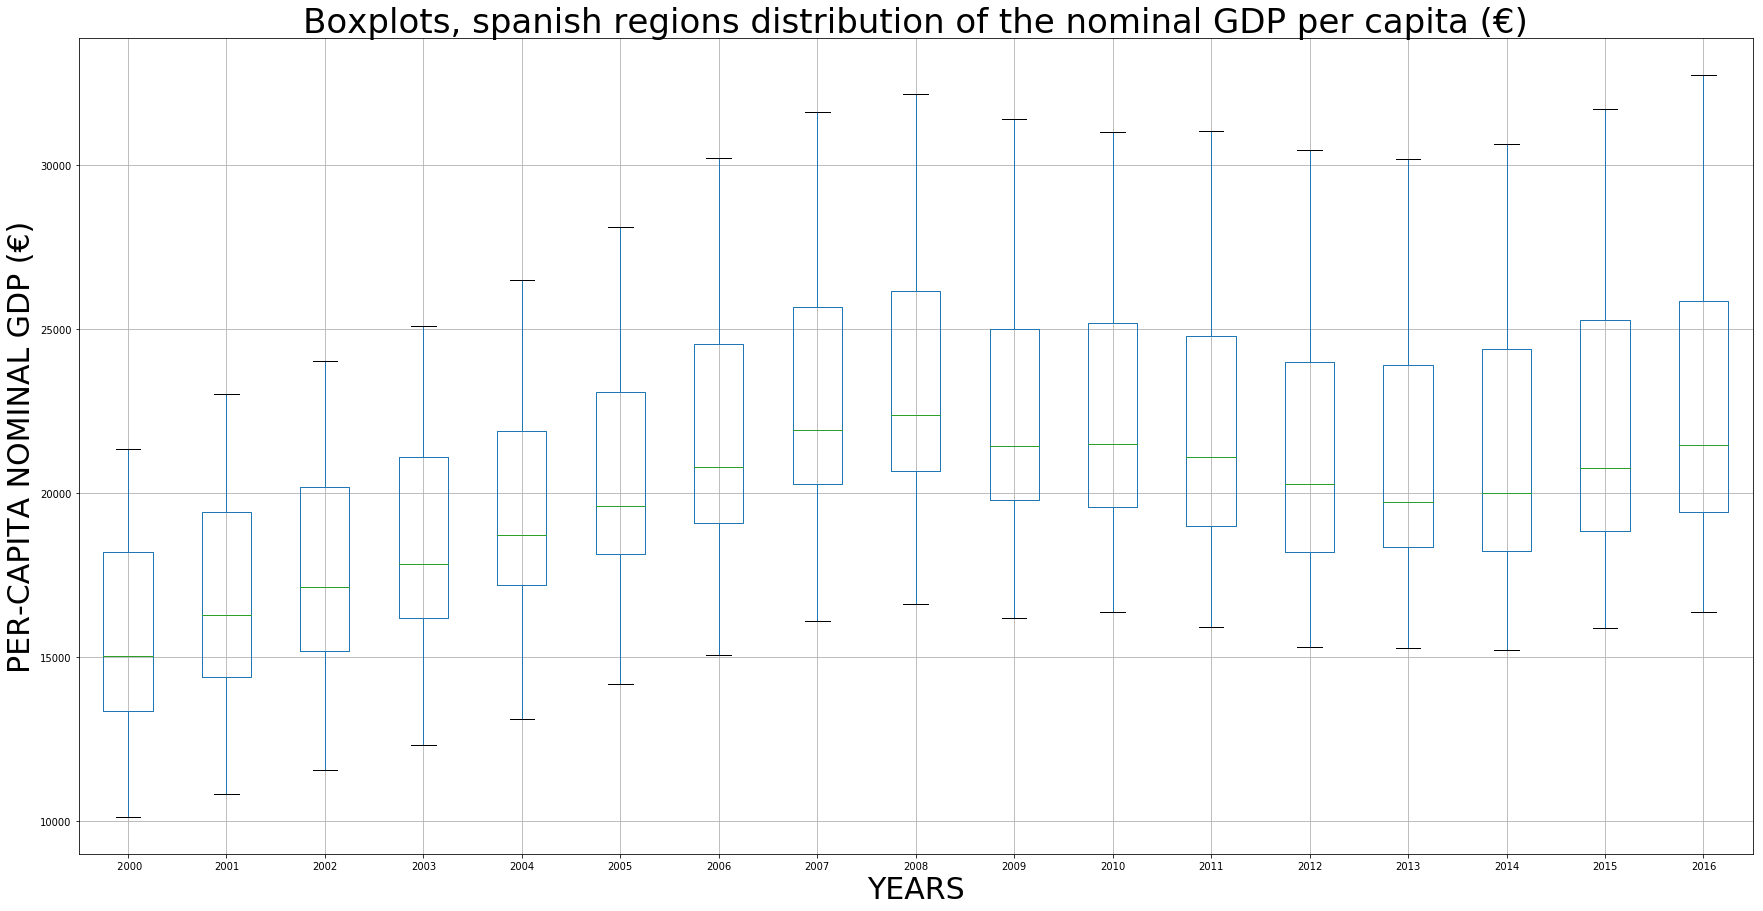

In [7]:
GDP_cap.plot(figsize=(30,15), kind='box', legend=True, use_index=True, grid=True)

SIZE = 24
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick X labels 
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick Y labels 

plt.xlabel('YEARS', size=30)                        # x title label 
plt.ylabel('PER-CAPITA NOMINAL GDP (€)', size=30)   # y title label 
plt.title('Boxplots, spanish regions distribution of the nominal GDP per capita (€)',
          size=34)    # plot title label                              

We can also create a **LINE PLOT** to visualize the trend and spread of the regions :

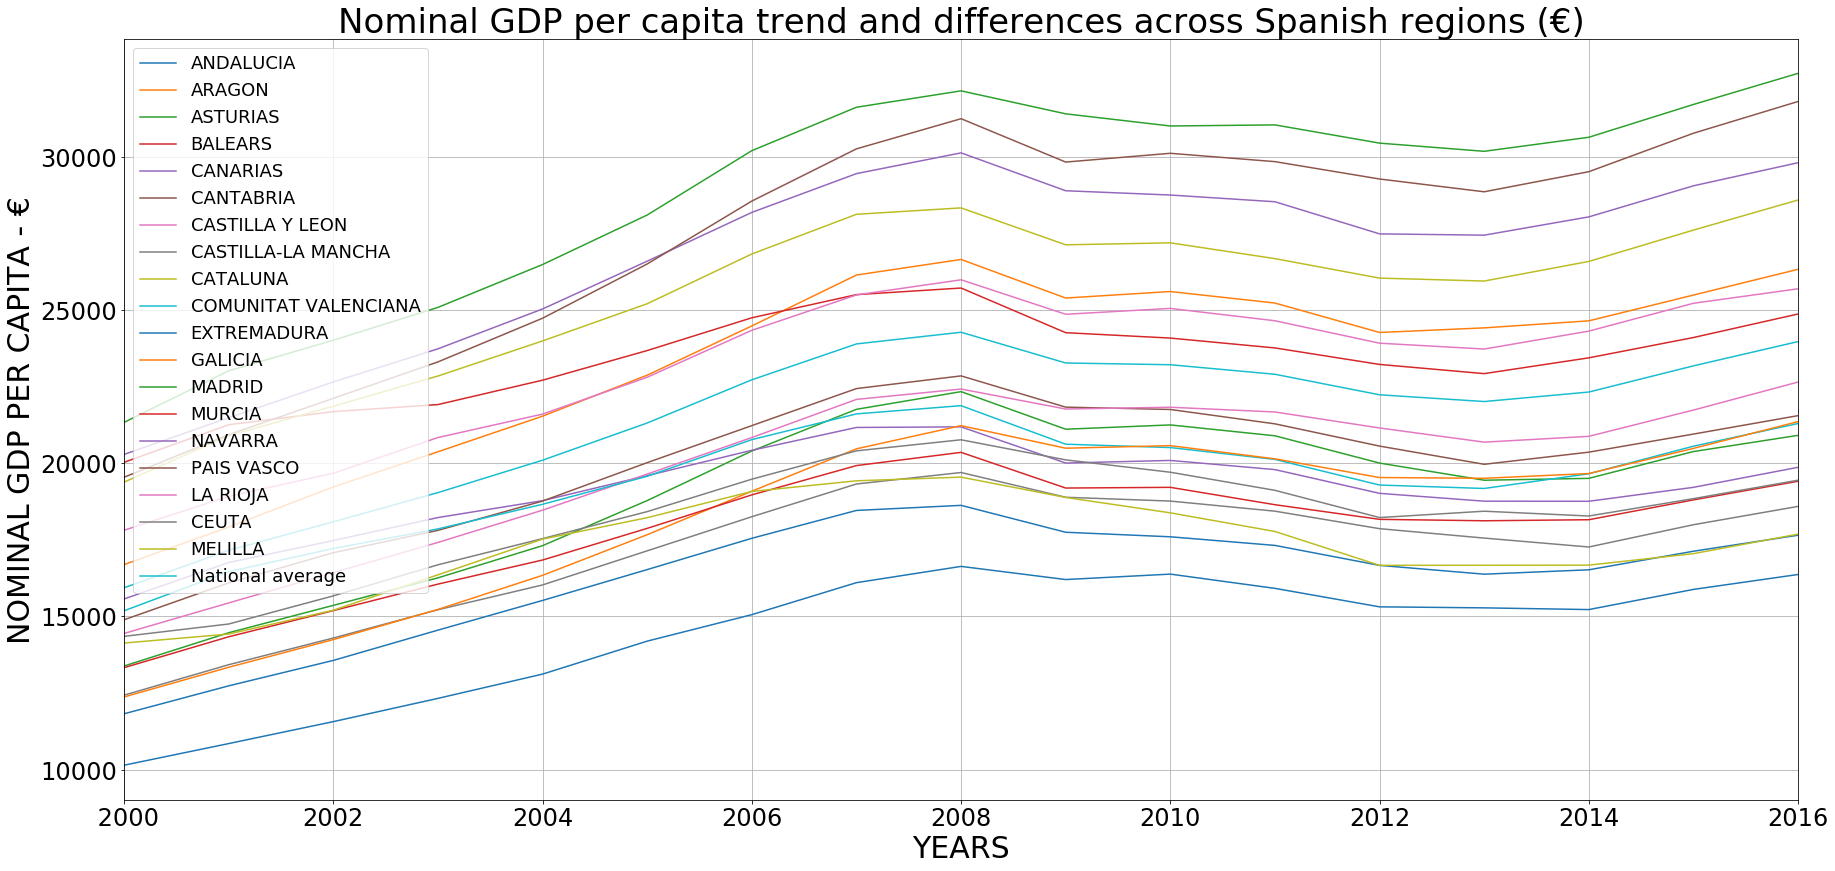

In [8]:
GDP_cap.transpose().plot(figsize=(30,14), kind='line',legend=True, use_index=True, grid=True)

SIZE = 24
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick X labels 
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick Y labels 

plt.xlabel('YEARS', size=30)
plt.ylabel('NOMINAL GDP PER CAPITA - €', size=30)
plt.title('Nominal GDP per capita trend and differences across Spanish regions (€)', size=34)
plt.legend(loc=2, prop={'size': 18}) #legend location and size

We can distinguish **3  economic cicles** :

1. From **2000 to 2008**:     *a period of continuous growth of the nominal GDP per capita in all regions.*
1. From **2008 to 2013** :     *the global recession starts a strong dowturn in all regions.*
1. From **2013 to 2016** :      *the start of a partial recovery of the nominal GDP per capita in all regions.*

**Both plots emmanate a relatively high spread of the nominal GDP per capita between regions**

For instance, at the year 2000  the region with the highest nominal GDP per capita - the region of Madrid with **21.333€** - had a value which more than doubled the region with the lowest nominal GDP per capita -Extremadura with **10.145€-**. 

In [9]:
21333/10145 # Per capita GDP of Madrid region/Per capita GDP of Extramdura (year 2000)

2.1028092656481023

In [10]:
GDP_cap.describe() # We can make a general overview of the stadistics of the DataSet

2000          2001          2002          2003          2004  \
count     20.0000     20.000000     20.000000     20.000000     20.000000   
mean   15653.4500  16733.650000  17630.850000  18556.400000  19554.150000   
std     3168.5103   3396.283344   3449.022429   3477.655387   3606.613593   
min    10145.0000  10851.000000  11567.000000  12326.000000  13118.000000   
25%    13368.5000  14402.750000  15199.750000  16208.000000  17192.750000   
50%    15038.0000  16278.000000  17148.500000  17833.000000  18712.500000   
75%    18205.5000  19414.000000  20175.750000  21107.000000  21879.750000   
max    21333.0000  23016.000000  24014.000000  25085.000000  26484.000000   

               2005          2006        2007          2008          2009  \
count     20.000000     20.000000     20.0000     20.000000     20.000000   
mean   20736.650000  22059.100000  23181.9500  23599.950000  22594.050000   
std     3773.040129   4068.523396   4245.0777   4340.754209   4195.237431   
min    14194.000000  15058.000000  16102.0000  16633.000000  16204.000000   
25%    18135.750000  19084.000000  20283.7500  20662.250000  19802.000000   
50%    19620.000000  20804.000000  21920.5000  22378.500000  21439.500000   
75%    23074.000000  24546.500000  25661.7500  26152.000000  24993.500000   
max    28100.000000  30200.000000  31617.0000  32152.000000  31402.000000   

               2010          2011          2012          2013          2014  \
count     20.000000     20.000000     20.000000     20.000000     20.000000   
mean   22553.400000  22187.400000  21467.300000  21274.450000  21521.700000   
std     4214.907746   4299.374917   4304.887248   4279.561174   4504.162357   
min    16381.000000  15916.000000  15313.000000  15280.000000  15224.000000   
25%    19582.750000  18997.750000  18212.250000  18356.000000  18246.750000   
50%    21502.000000  21090.000000  20282.000000  19736.500000  20012.000000   
75%    25189.750000  24793.500000  24004.500000  23898.750000  24394.750000   
max    31005.000000  31041.000000  30446.000000  30179.000000  30637.000000   

               2015          2016  
count     20.000000     20.000000  
mean   22307.200000  23028.600000  
std     4682.803868   4813.163129  
min    15882.000000  16369.000000  
25%    18833.750000  19437.250000  
50%    20753.500000  21455.500000  
75%    25287.000000  25851.000000  
max    31708.000000  32723.000000

![](http://)To generate a *visualization/examination* of the divergence between regions we can concatenate the series of both the **maximum **and the **minimum** values, and create a new **DataFrame**

In [11]:
GDP_cap_max=GDP_cap.max() # we create the series containing the maximum values per year

In [12]:
GDP_cap_min=GDP_cap.min() # we create the series containing the lowest values per year

In [13]:
Max_Min_GDP_cap = pd.concat([GDP_cap_max,GDP_cap_min], axis=1) 
# We concatenate both series into a new DataFrame

In [14]:
Max_Min_GDP_cap.columns = Max_Min_GDP_cap.columns.astype(str) 
# We transform into strings

In [15]:
Max_Min_GDP_cap.columns = ['MAX_GDP_cap', 'MIN_GDP_cap'] 
# We label our columns appropiately 

In [16]:
Max_Min_GDP_cap.head() # We can check the head our new DataFrame

MAX_GDP_cap  MIN_GDP_cap
 2000        21333        10145
2001         23016        10851
2002         24014        11567
2003         25085        12326
2004         26484        13118

 We can visualize the divergence trend between the Max/Min nominal GDP per capita series

Text(0.5, 1.0, 'MAX/MIN regional values of the GDP per capita (Regions of Spain, €)')

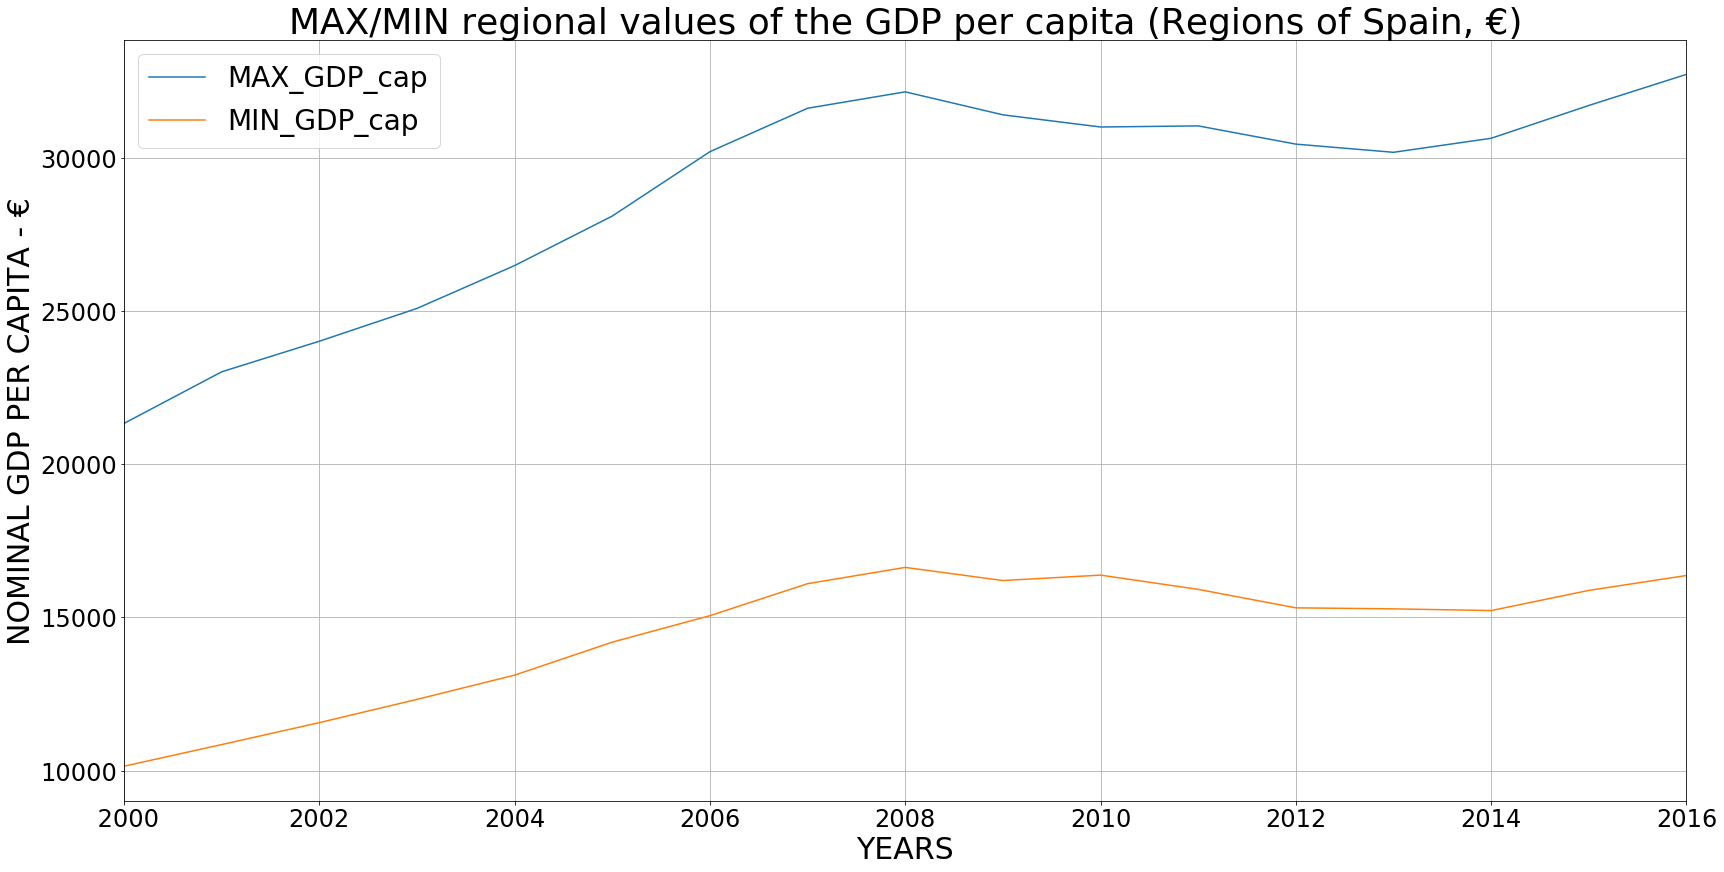

In [17]:
Max_Min_GDP_cap.plot(figsize=(28,14), kind='line',legend=True, use_index=True, grid=True)

SIZE = 24
plt.rc('xtick', labelsize=SIZE)    # fontsize of the tick X labels
plt.rc('ytick', labelsize=SIZE)    # fontsize of the tick Y labels

plt.xlabel('YEARS', size=30)
plt.ylabel('NOMINAL GDP PER CAPITA - €', size=30)
plt.legend(loc=2, prop={'size': 28})
plt.title('MAX/MIN regional values of the GDP per capita (Regions of Spain, €)', size=36)

We can create a new column in our DataFrame to calculates the % difference between the Max and the Min :

In [18]:
Max_Min_GDP_cap['% min/max']=Max_Min_GDP_cap['MIN_GDP_cap']/Max_Min_GDP_cap['MAX_GDP_cap']

In [19]:
Max_Min_GDP_cap 
# In our new colum we see the % of the minimum value versus the maximum value per year

MAX_GDP_cap  MIN_GDP_cap  % min/max
 2000        21333        10145   0.475554
2001         23016        10851   0.471455
2002         24014        11567   0.481677
2003         25085        12326   0.491369
2004         26484        13118   0.495318
2005         28100        14194   0.505125
2006         30200        15058   0.498609
2007         31617        16102   0.509283
2008         32152        16633   0.517324
2009         31402        16204   0.516018
2010         31005        16381   0.528334
2011         31041        15916   0.512741
2012         30446        15313   0.502956
2013         30179        15280   0.506312
2014         30637        15224   0.496915
2015         31708        15882   0.500883
2016         32723        16369   0.500229

**MAX/MIN spread** of the nominal GDP per capita across spanish regions

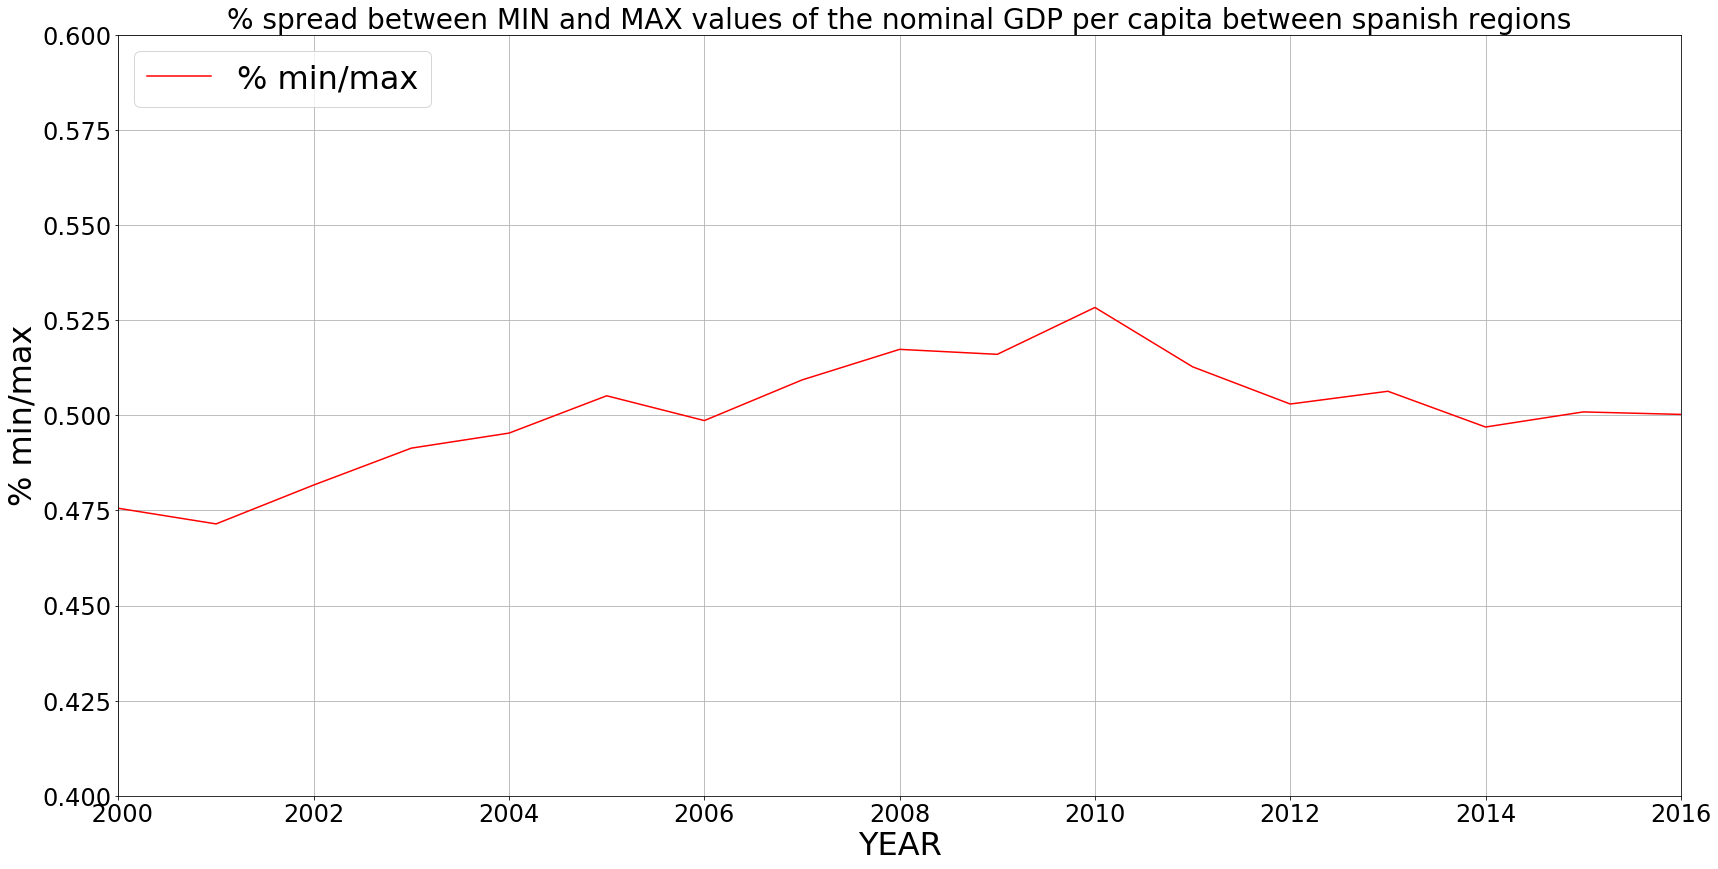

In [20]:
ax=Max_Min_GDP_cap['% min/max'].plot(figsize=(28,14),kind='line', legend=True, use_index=True, grid=True,  color='r',
                                title='% difference between MIN and MAX Per-Capita GDP across spanish regions')
ax.set_ybound(0.4,0.6)
ax.set_xlabel('YEAR',size=32) 
ax.set_ylabel('% min/max', size=32)
ax.set_title('% spread between MIN and MAX values of the nominal GDP per capita between spanish regions', size=28)
plt.legend(loc=2, prop={'size': 32}) #legend location and size
plt.show()

We see that at 2001 there was the maximum divergence between the minimum and the maximum value **0.471455**. We see a very slight convergence in the 2000s decade, which was stopped at 2010.

Let's calculate the standard deviation of the series :

In [21]:
Max_Min_GDP_cap['% min/max'].std()

0.014861261843479915

With a standard deviation of only **0.014861261843479915** we see how regular is the series.

**VISUALIZATION:** MIN and MAX nominal GDP per Capita across spanish regions :

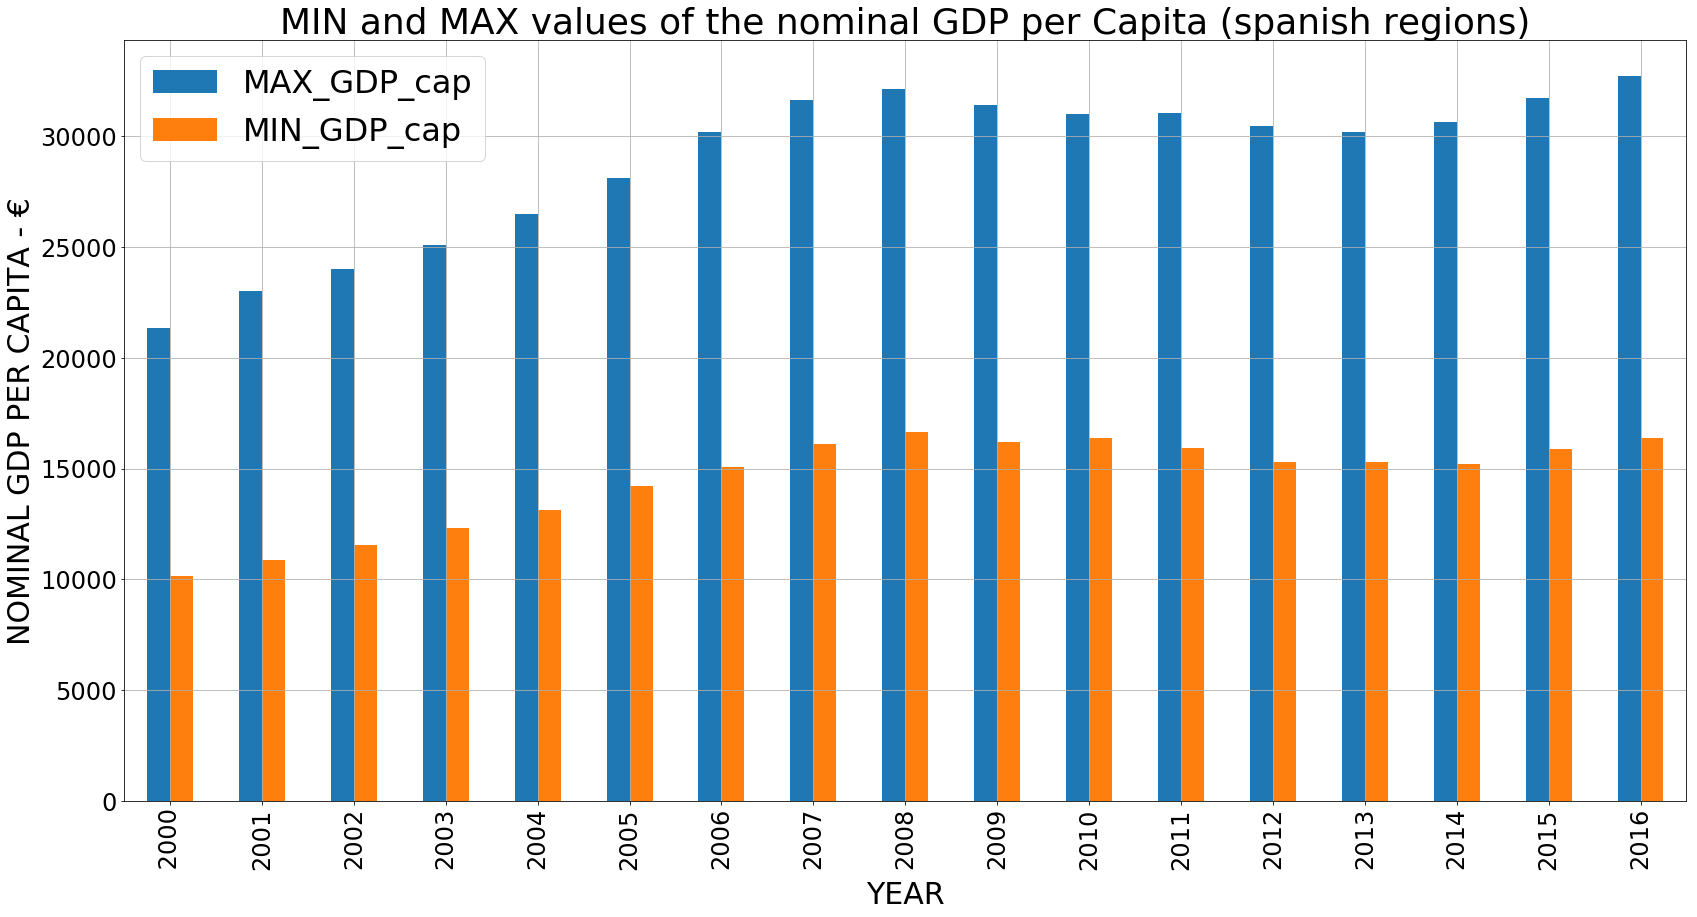

In [22]:
ax1=Max_Min_GDP_cap.drop(['% min/max'], axis=1).plot(figsize=(28,14),kind='bar', use_index=True, grid=True)
ax1.set_xlabel('YEAR',size=30) 
ax1.set_ylabel('NOMINAL GDP PER CAPITA - €', size=30)
ax1.set_title('MIN and MAX values of the nominal GDP per Capita (spanish regions)', size=36)
plt.legend(loc=2, prop={'size': 32}) #legend location and size
plt.show()

**CONCLUSION :**

During the last 16 years,  the spread between the maximum and the minimum values of the nominal GDP per capita across spanish regions has remained very steady

We can conclude that in spite of the efforts by the spanish governement to redistribute the country's wealth across its regions; there has not been a regional convergence  in terms of nominal GDP per capita. 

The differences in 2016 are almost the same to those of the year 2000.


# ANNEX 3D CLUSTERING

In [23]:
from sklearn.decomposition import PCA
pca = PCA(n_components=3)
pca.fit(GDP_cap)

PCA(copy=True, iterated_power='auto', n_components=3, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [24]:
# Now we can transform our DataSet
GDP_cap_3d = pca.transform(GDP_cap)

In [25]:
# We generate a new Dataframe with our three components as variables
GDP_cap_3d = pd.DataFrame(GDP_cap_3d)
GDP_cap_3d.index = GDP_cap.index
GDP_cap_3d.columns = ['PC1','PC2','PC3']

In [26]:
GDP_cap_3d

PC1          PC2          PC3
REGION                                                      
ANDALUCIA            -19070.336969  -411.490122   133.756293
ARAGON                10612.544209 -1609.503333   385.134449
ASTURIAS              -7368.023099 -1906.716507   931.845568
BALEARS                9948.680408  5169.618338  -854.311393
CANARIAS              -7750.641861  3498.123841  -110.717086
CANTABRIA             -3755.665046   296.013024   545.789614
CASTILLA Y LEON       -3508.480008 -1548.578219  -461.338796
CASTILLA-LA MANCHA   -15434.740148  -706.863407   232.218445
CATALUNA              19109.599612   952.421620  -251.163288
COMUNITAT VALENCIANA  -6109.484391  1799.261410  -485.912101
EXTREMADURA          -26119.565223 -2565.323848  -925.622244
GALICIA              -10029.056210 -3806.580101  -446.397313
MADRID                33459.985209  -876.692010    50.364513
MURCIA               -12738.077473   156.604451  -200.427198
NAVARRA               24614.695506   420.149285   436.305119
PAIS VASCO            27865.894205 -2941.172232    21.403783
LA RIOJA               9788.401184   371.091549  -425.416836
CEUTA                -10993.108915  1059.709957   374.046384
MELILLA              -15249.011689  2949.388054  1112.571228
National average       2726.390697  -299.461751   -62.129141

In [27]:
from sklearn.cluster import KMeans

In [28]:
kmeans = KMeans(n_clusters=3)

In [29]:
clusters = kmeans.fit(GDP_cap)

In [30]:
GDP_cap_3d['cluster'] = pd.Series(clusters.labels_, index=GDP_cap.index)

In [31]:
GDP_cap_3d

PC1          PC2          PC3  cluster
REGION                                                               
ANDALUCIA            -19070.336969  -411.490122   133.756293        1
ARAGON                10612.544209 -1609.503333   385.134449        0
ASTURIAS              -7368.023099 -1906.716507   931.845568        1
BALEARS                9948.680408  5169.618338  -854.311393        0
CANARIAS              -7750.641861  3498.123841  -110.717086        1
CANTABRIA             -3755.665046   296.013024   545.789614        1
CASTILLA Y LEON       -3508.480008 -1548.578219  -461.338796        1
CASTILLA-LA MANCHA   -15434.740148  -706.863407   232.218445        1
CATALUNA              19109.599612   952.421620  -251.163288        2
COMUNITAT VALENCIANA  -6109.484391  1799.261410  -485.912101        1
EXTREMADURA          -26119.565223 -2565.323848  -925.622244        1
GALICIA              -10029.056210 -3806.580101  -446.397313        1
MADRID                33459.985209  -876.692010    50.364513        2
MURCIA               -12738.077473   156.604451  -200.427198        1
NAVARRA               24614.695506   420.149285   436.305119        2
PAIS VASCO            27865.894205 -2941.172232    21.403783        2
LA RIOJA               9788.401184   371.091549  -425.416836        0
CEUTA                -10993.108915  1059.709957   374.046384        1
MELILLA              -15249.011689  2949.388054  1112.571228        1
National average       2726.390697  -299.461751   -62.129141        0

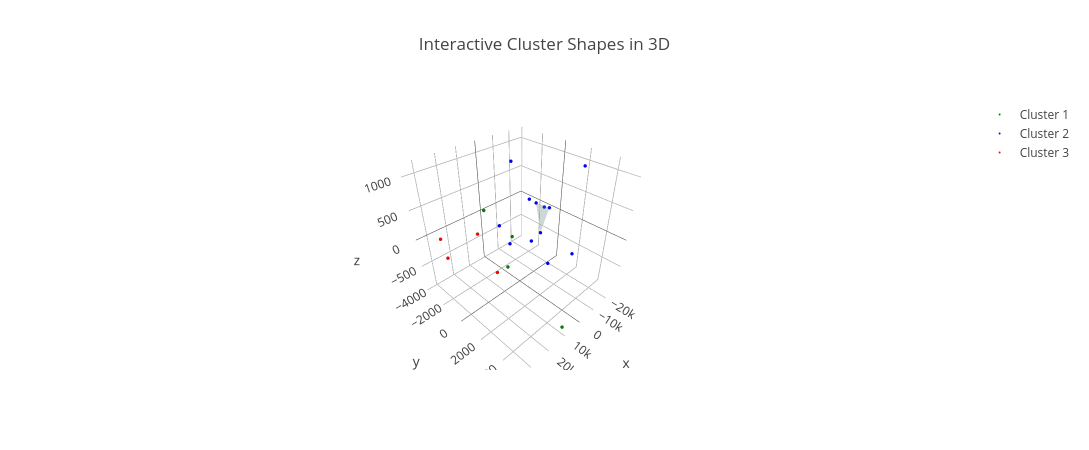

In [32]:
# Visualize cluster shapes in 3d.

# Set notebook mode to work in offline
plotly.offline.init_notebook_mode()

cluster1=GDP_cap_3d.loc[GDP_cap_3d['cluster'] == 0]
cluster2=GDP_cap_3d.loc[GDP_cap_3d['cluster'] == 1]
cluster3=GDP_cap_3d.loc[GDP_cap_3d['cluster'] == 2]

scatter1 = dict(mode = "markers", name = "Cluster 1", type = "scatter3d",    
x = cluster1.as_matrix()[:,0], 
y = cluster1.as_matrix()[:,1], 
z = cluster1.as_matrix()[:,2],
marker = dict( size=2, color='green')
               )
scatter2 = dict(mode = "markers",name = "Cluster 2",type = "scatter3d",    
x = cluster2.as_matrix()[:,0], 
y = cluster2.as_matrix()[:,1], 
z = cluster2.as_matrix()[:,2],
marker = dict( size=2, color='blue')
              )
scatter3 = dict(mode = "markers",name = "Cluster 3",type = "scatter3d",    
x = cluster3.as_matrix()[:,0], 
y = cluster3.as_matrix()[:,1], 
z = cluster3.as_matrix()[:,2],
marker = dict( size=2, color='red')
)

cluster1 = dict(alphahull = 5, name = "Cluster 1", opacity = .1, type = "mesh3d",    
x = cluster1.as_matrix()[:,0], y = cluster1.as_matrix()[:,1], z = cluster1.as_matrix()[:,2],
color='gray', showscale = True)

cluster2 = dict(alphahull = 5,name = "Cluster 2",opacity = .1, type = "mesh3d",    
x = cluster2.as_matrix()[:,0], y = cluster2.as_matrix()[:,1], z = cluster2.as_matrix()[:,2],
color='cyan', showscale = True)

cluster3 = dict( alphahull = 5,name = "Cluster 3",opacity = .1,type = "mesh3d",    
x = cluster3.as_matrix()[:,0], y = cluster3.as_matrix()[:,1], z = cluster3.as_matrix()[:,2],
color='coral', showscale = True)

layout = dict(title = 'Interactive Cluster Shapes in 3D',
              scene = dict( xaxis = dict( zeroline=True ),yaxis = dict( zeroline=True ),
             zaxis = dict( zeroline=True )))

fig = dict( data=[scatter1, scatter2, scatter3, cluster1, cluster2, cluster3], 
    layout=layout )

# Use py.iplot() for IPython notebook
plotly.offline.iplot(fig, filename='mesh3d_sample')